In [1]:
#Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

#Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
CountryData=pd.read_excel('D:/Ment Class/Practise11/Excel Data/CountryData.xlsx')

In [3]:
CountryData.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
CountryData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
CountryData[CountryData.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [6]:
CountryData.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


child_mort
Skew : 1.45


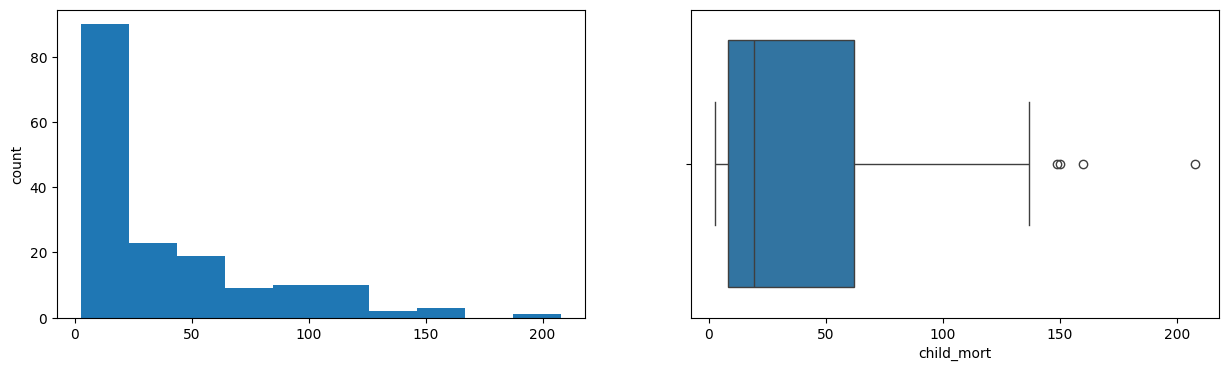

exports
Skew : 2.45


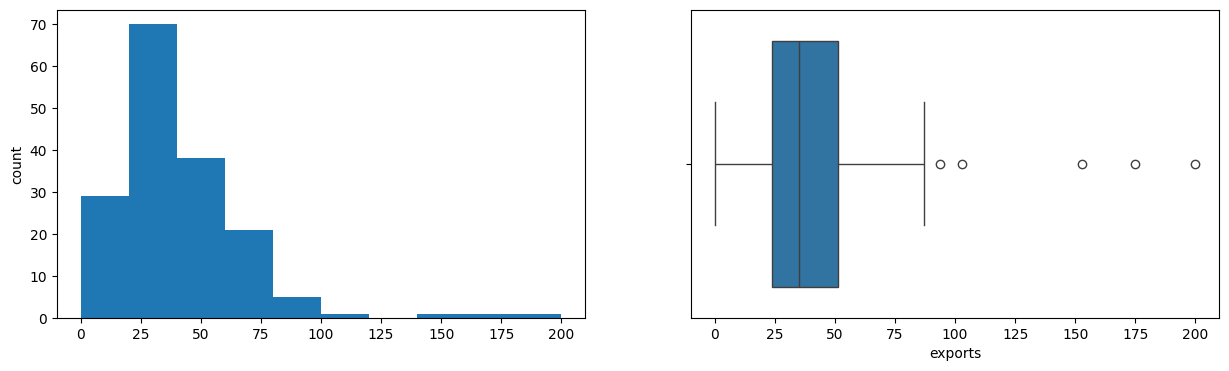

health
Skew : 0.71


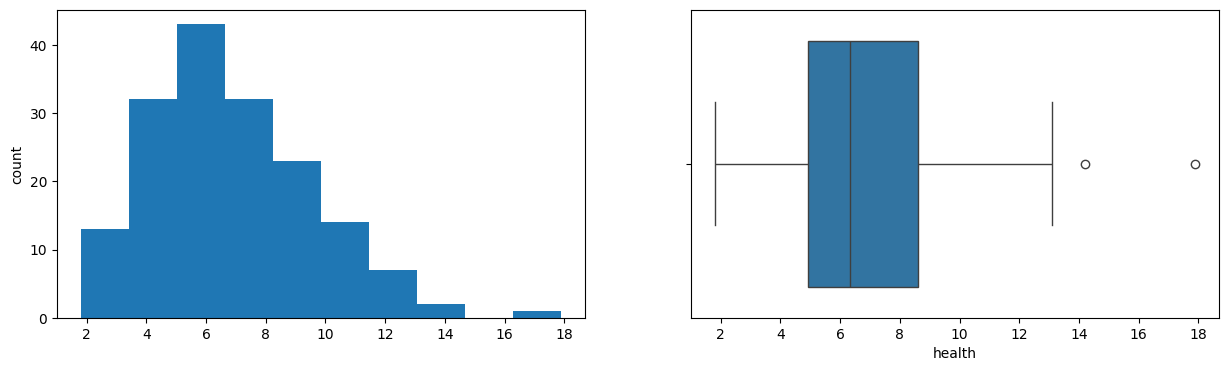

imports
Skew : 1.91


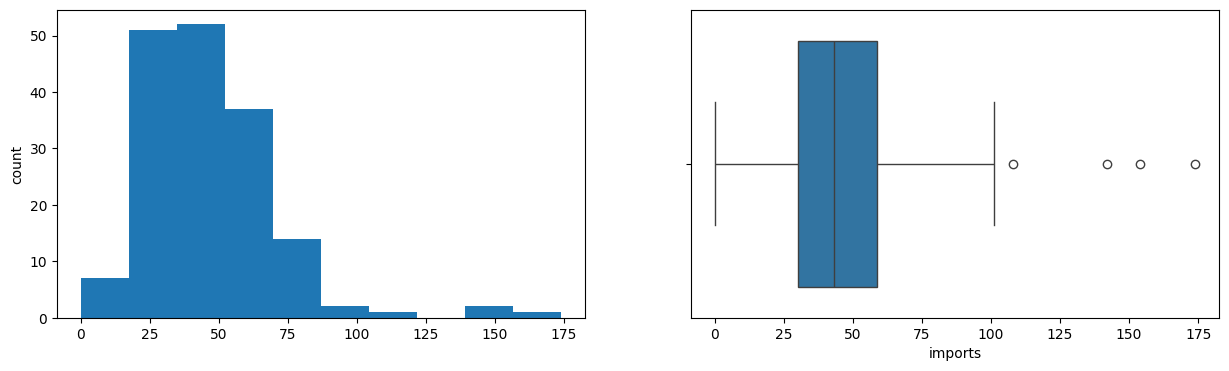

income
Skew : 2.23


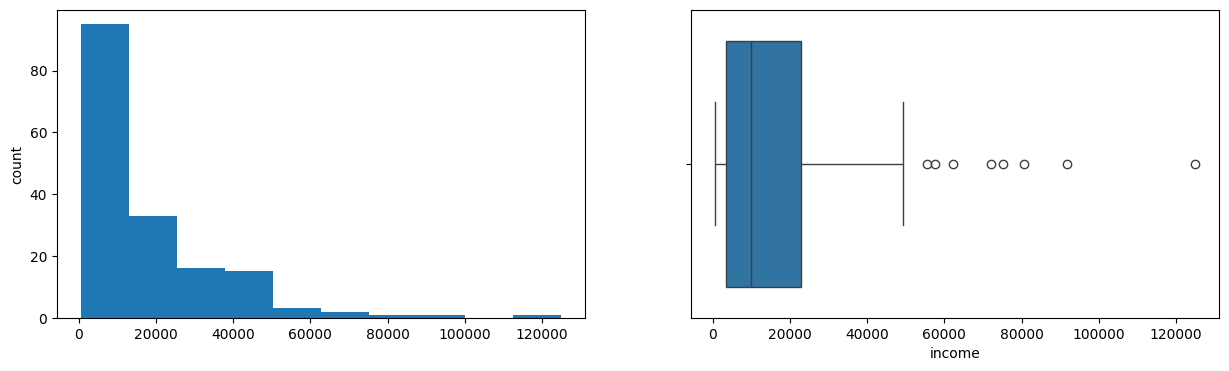

inflation
Skew : 5.15


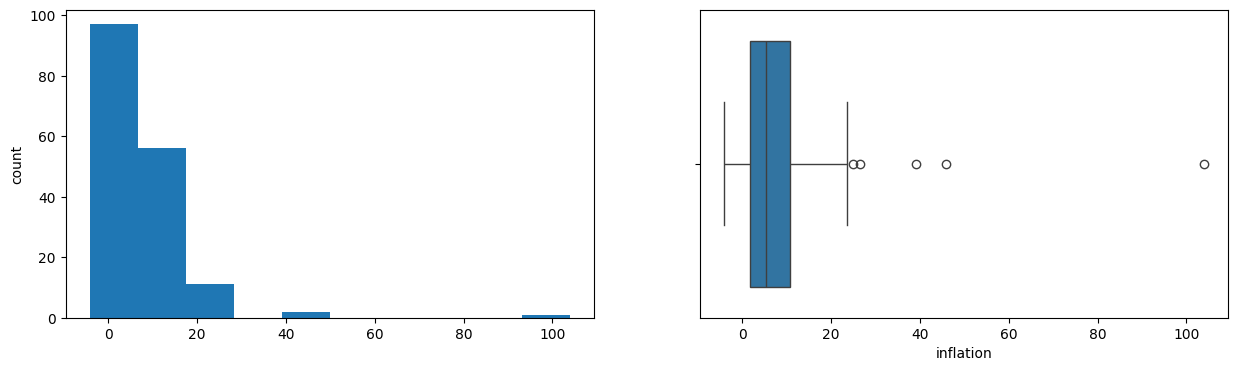

life_expec
Skew : -0.97


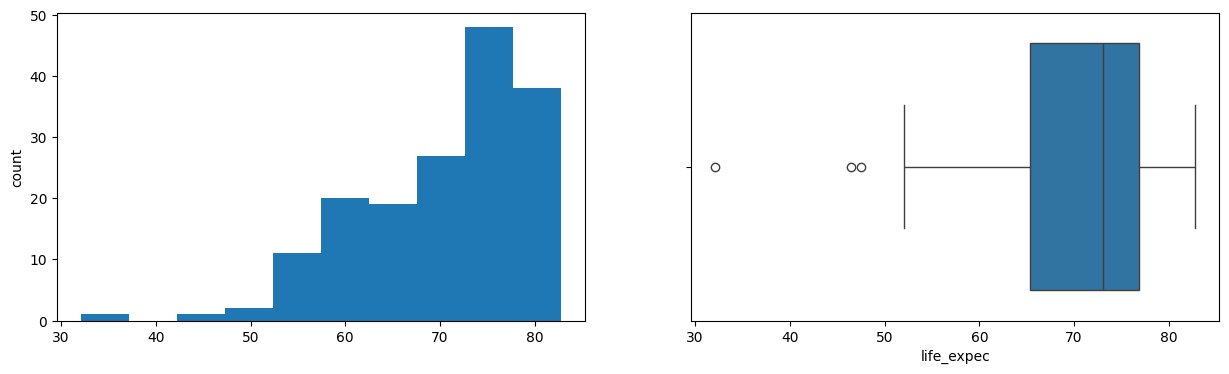

total_fer
Skew : 0.97


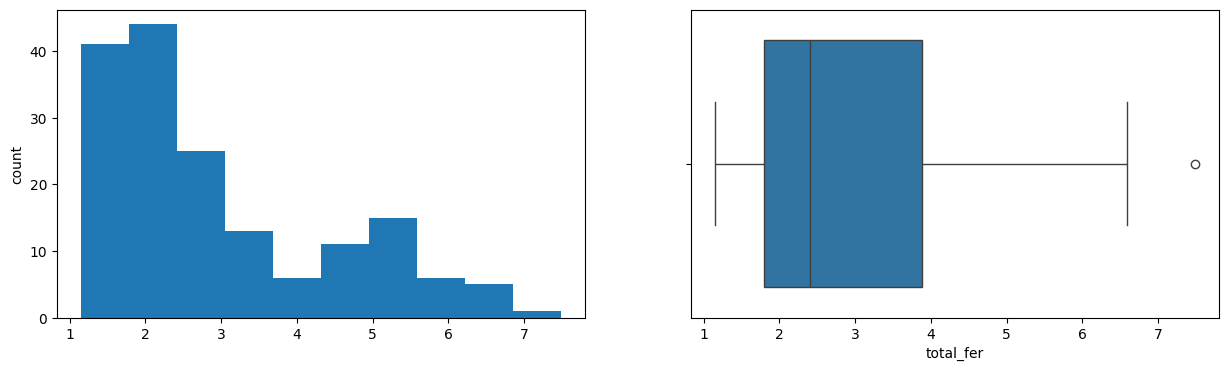

gdpp
Skew : 2.22


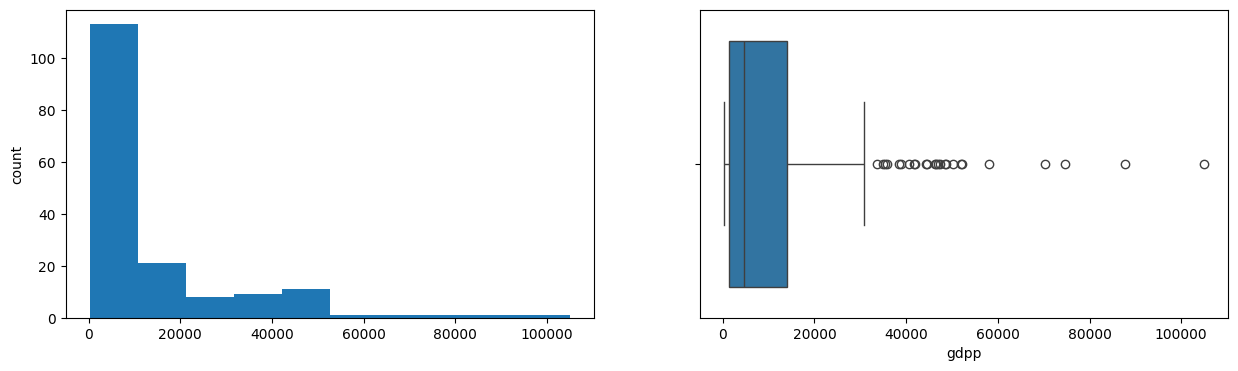

In [7]:
for col in CountryData.columns[1:]:
    print(col)
    print('Skew :',round(CountryData[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    CountryData[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=CountryData[col])
    plt.show()

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object


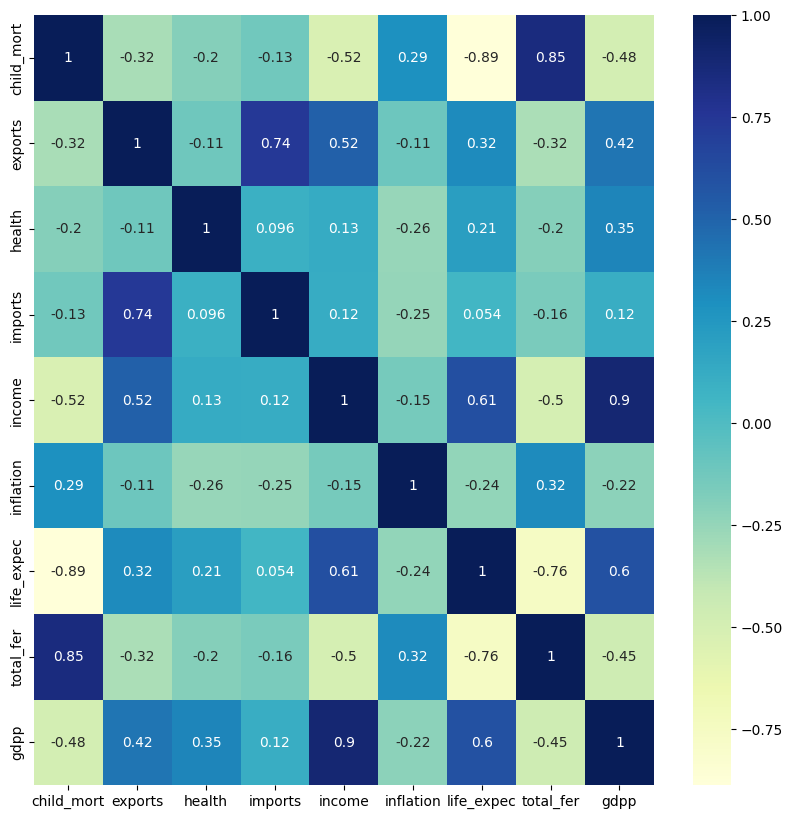

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame loading, replace with your actual DataFrame loading code
# CountryData = pd.read_excel('your_file.xlsx')

# Check data types
print(CountryData.dtypes)

# Filter numeric columns
numeric_data = CountryData.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [11]:
data_new = CountryData.drop(columns=["country", "gdpp"])

In [12]:
#Scaling the data and storing the output as a new dataframe
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data_new), columns=data_new.columns)

data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946


In [13]:
#Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep=True)

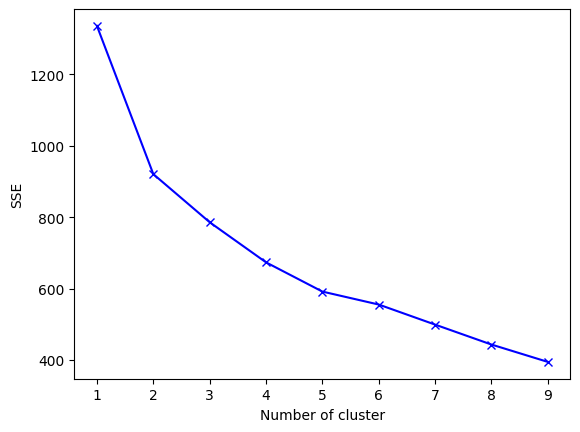

In [14]:
#Empty dictionary to store the SSE for each value of k
sse = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_ 

#Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

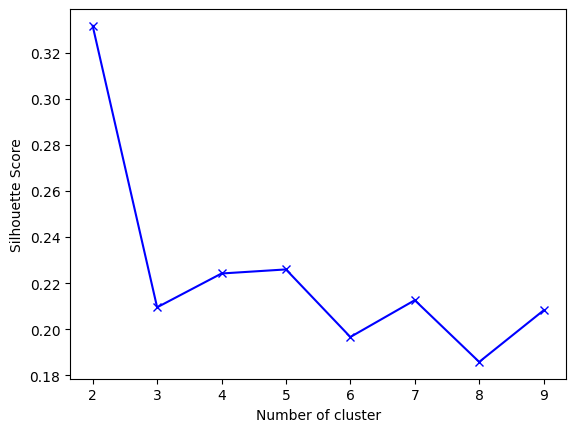

In [15]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

In [17]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(data_scaled)

#Adding predicted labels to the original data and scaled data 
data_scaled_copy['KMeans_Labels'] = kmeans.predict(data_scaled)
CountryData['KMeans_Labels'] = kmeans.predict(data_scaled)

In [18]:
CountryData['KMeans_Labels'].value_counts()

KMeans_Labels
0    67
2    59
1    41
Name: count, dtype: int64

In [27]:
import pandas as pd

# Filter out non-numeric columns
numeric_columns = CountryData.select_dtypes(include=['number']).columns

# Group by 'KMeans_Labels' and calculate mean and median for numeric columns only
mean = CountryData.groupby('KMeans_Labels')[numeric_columns].mean()
median = CountryData.groupby('KMeans_Labels')[numeric_columns].median()

# Concatenate mean and median results
df_kmeans = pd.concat([mean, median], axis=0)

# Set custom index labels
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 
                   'group_0 Median', 'group_1 Median', 'group_2 Median']

# Transpose the DataFrame
df_kmeans_transposed = df_kmeans.T

# Display the transposed DataFrame
print(df_kmeans_transposed)

               group_0 Mean  group_1 Mean  group_2 Mean  group_0 Median  \
child_mort        28.667164     98.231707      7.506780           24.10   
exports           36.726701     27.258780     55.710169           32.70   
health             5.665672      6.338049      8.453559            5.44   
imports           42.459193     42.621951     54.888136           42.10   
income         10820.000000   2913.487805  34216.440678         9350.00   
inflation          9.550761     12.285244      2.643559            7.20   
life_expec        70.901493     58.973171     78.211864           71.50   
total_fer          2.585075      5.232195      1.772712            2.58   
gdpp            5130.328358   1393.707317  29900.677966         4140.00   
KMeans_Labels      0.000000      1.000000      2.000000            0.00   

               group_1 Median  group_2 Median  
child_mort              92.10            6.00  
exports                 22.80           49.40  
health                   5.30 

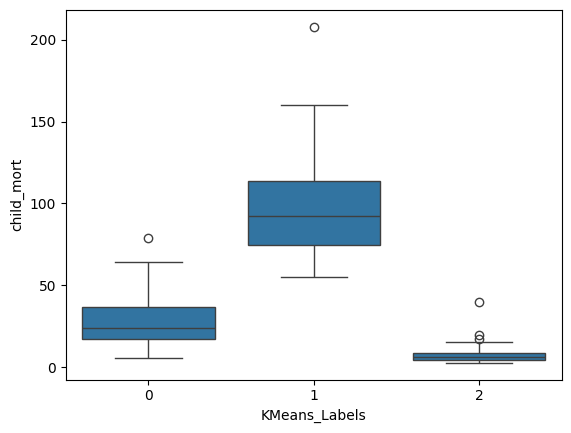

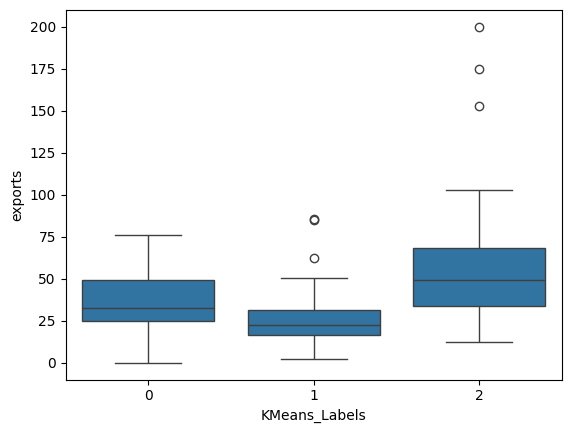

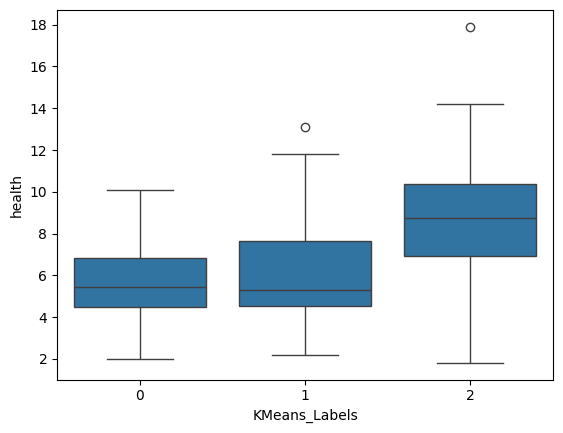

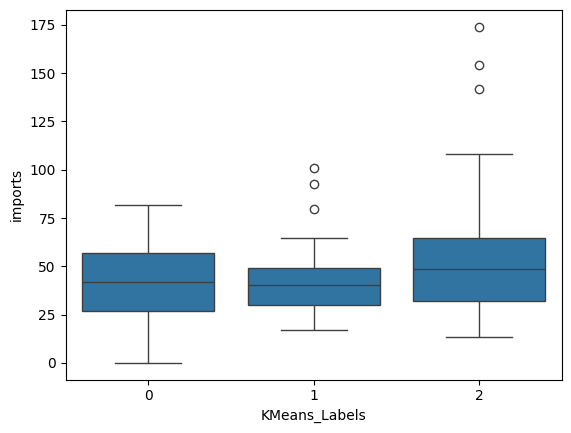

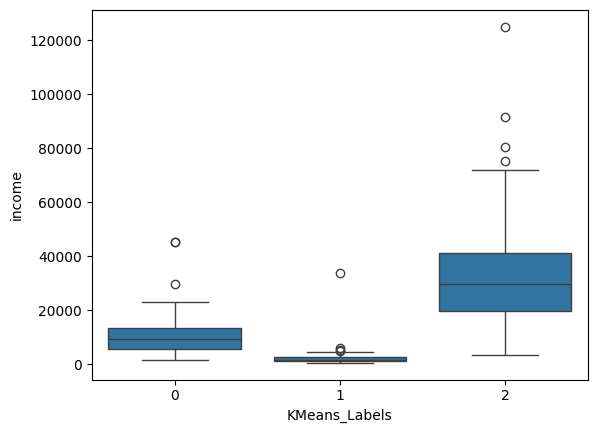

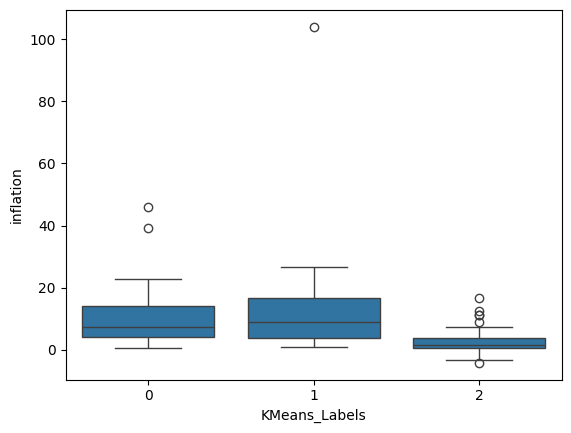

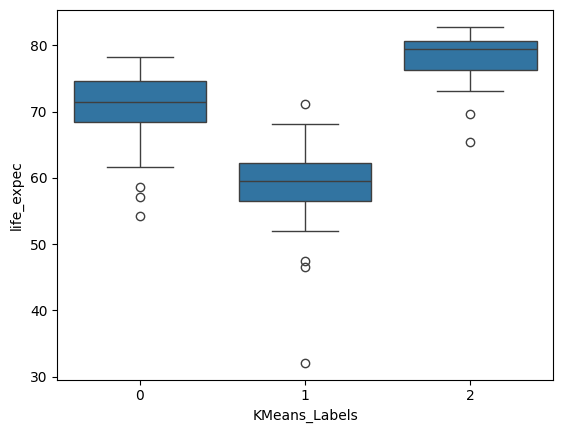

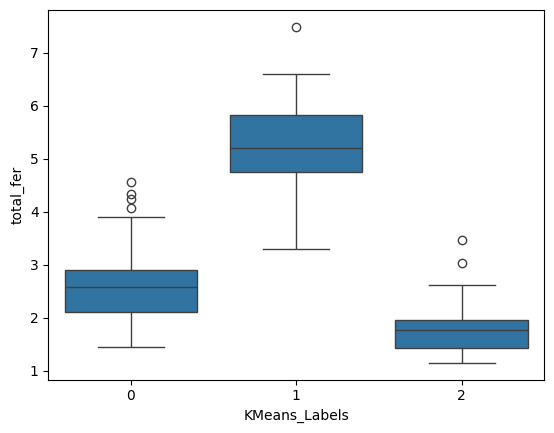

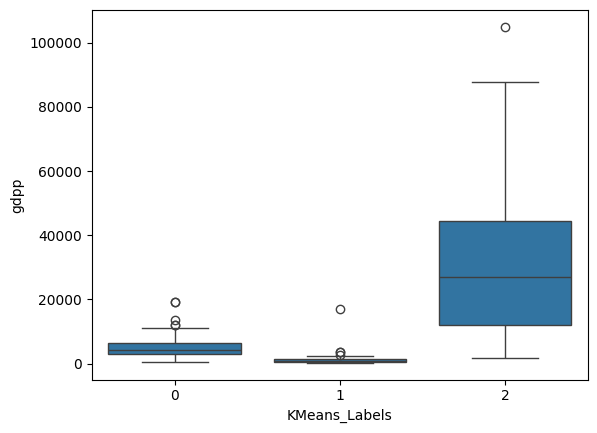

In [28]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.boxplot(x = 'KMeans_Labels', y = col, data = CountryData)
    plt.show()

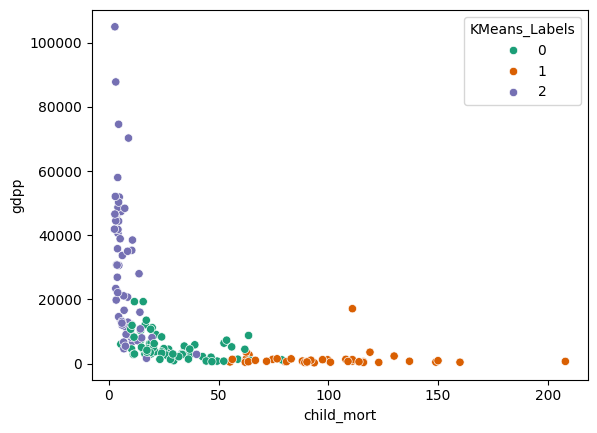

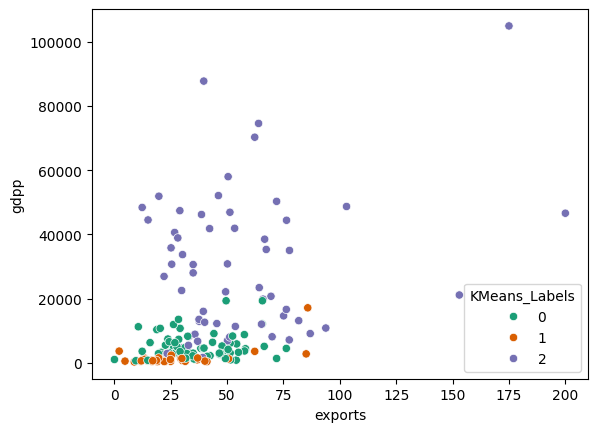

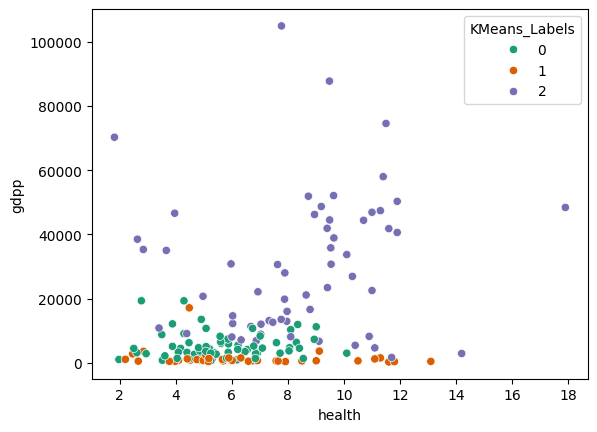

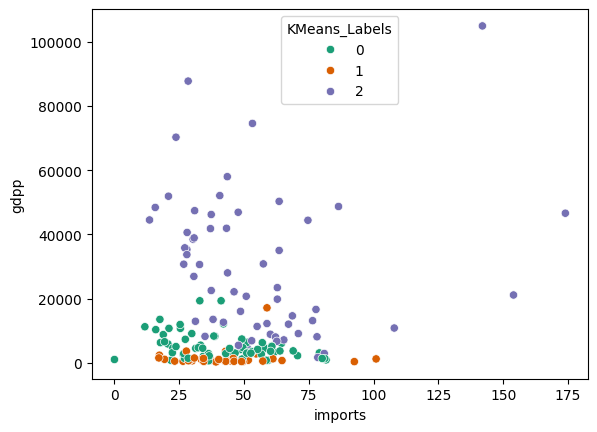

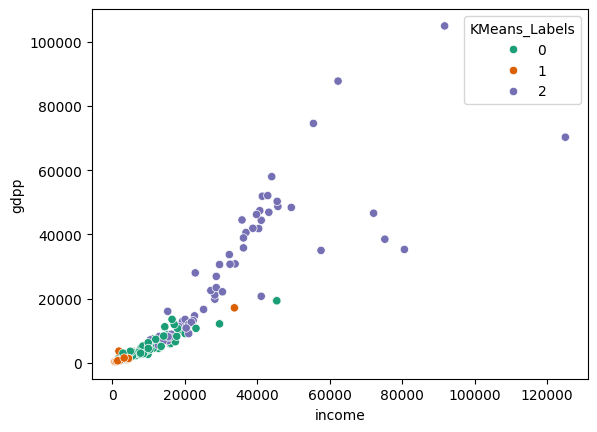

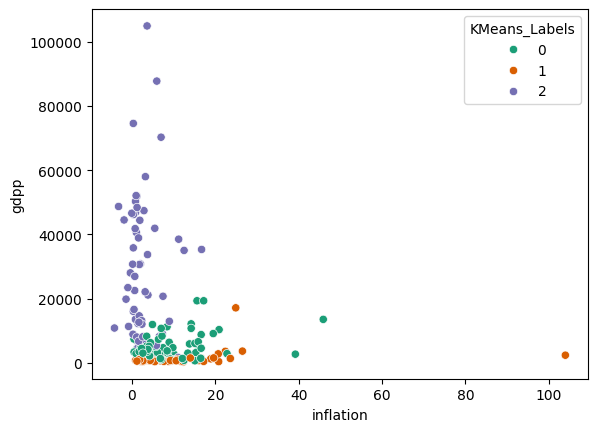

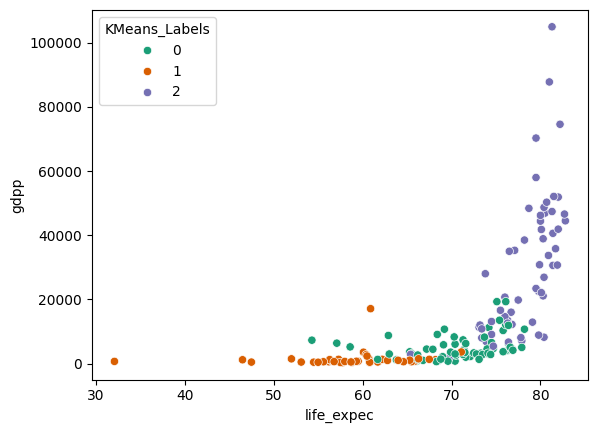

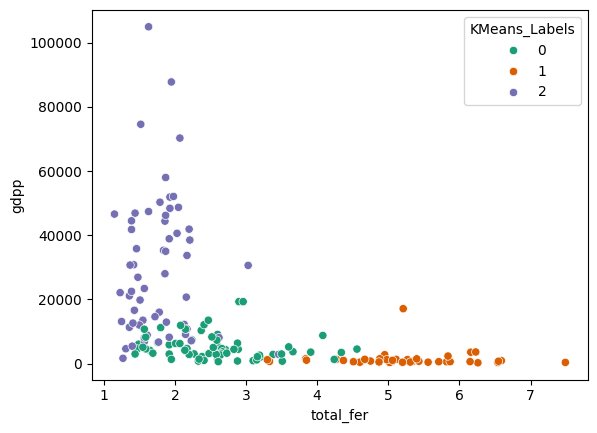

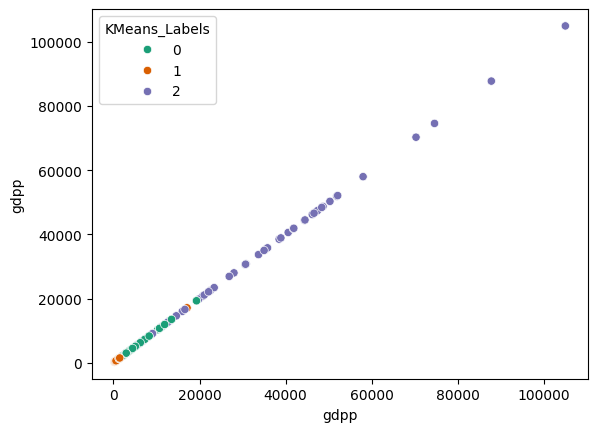

In [29]:
cols_visualise = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for col in cols_visualise:
    sns.scatterplot(x = col, y = 'gdpp',data = CountryData ,hue='KMeans_Labels', palette='Dark2')
    plt.show()

In [30]:
import scipy.cluster.hierarchy as shc

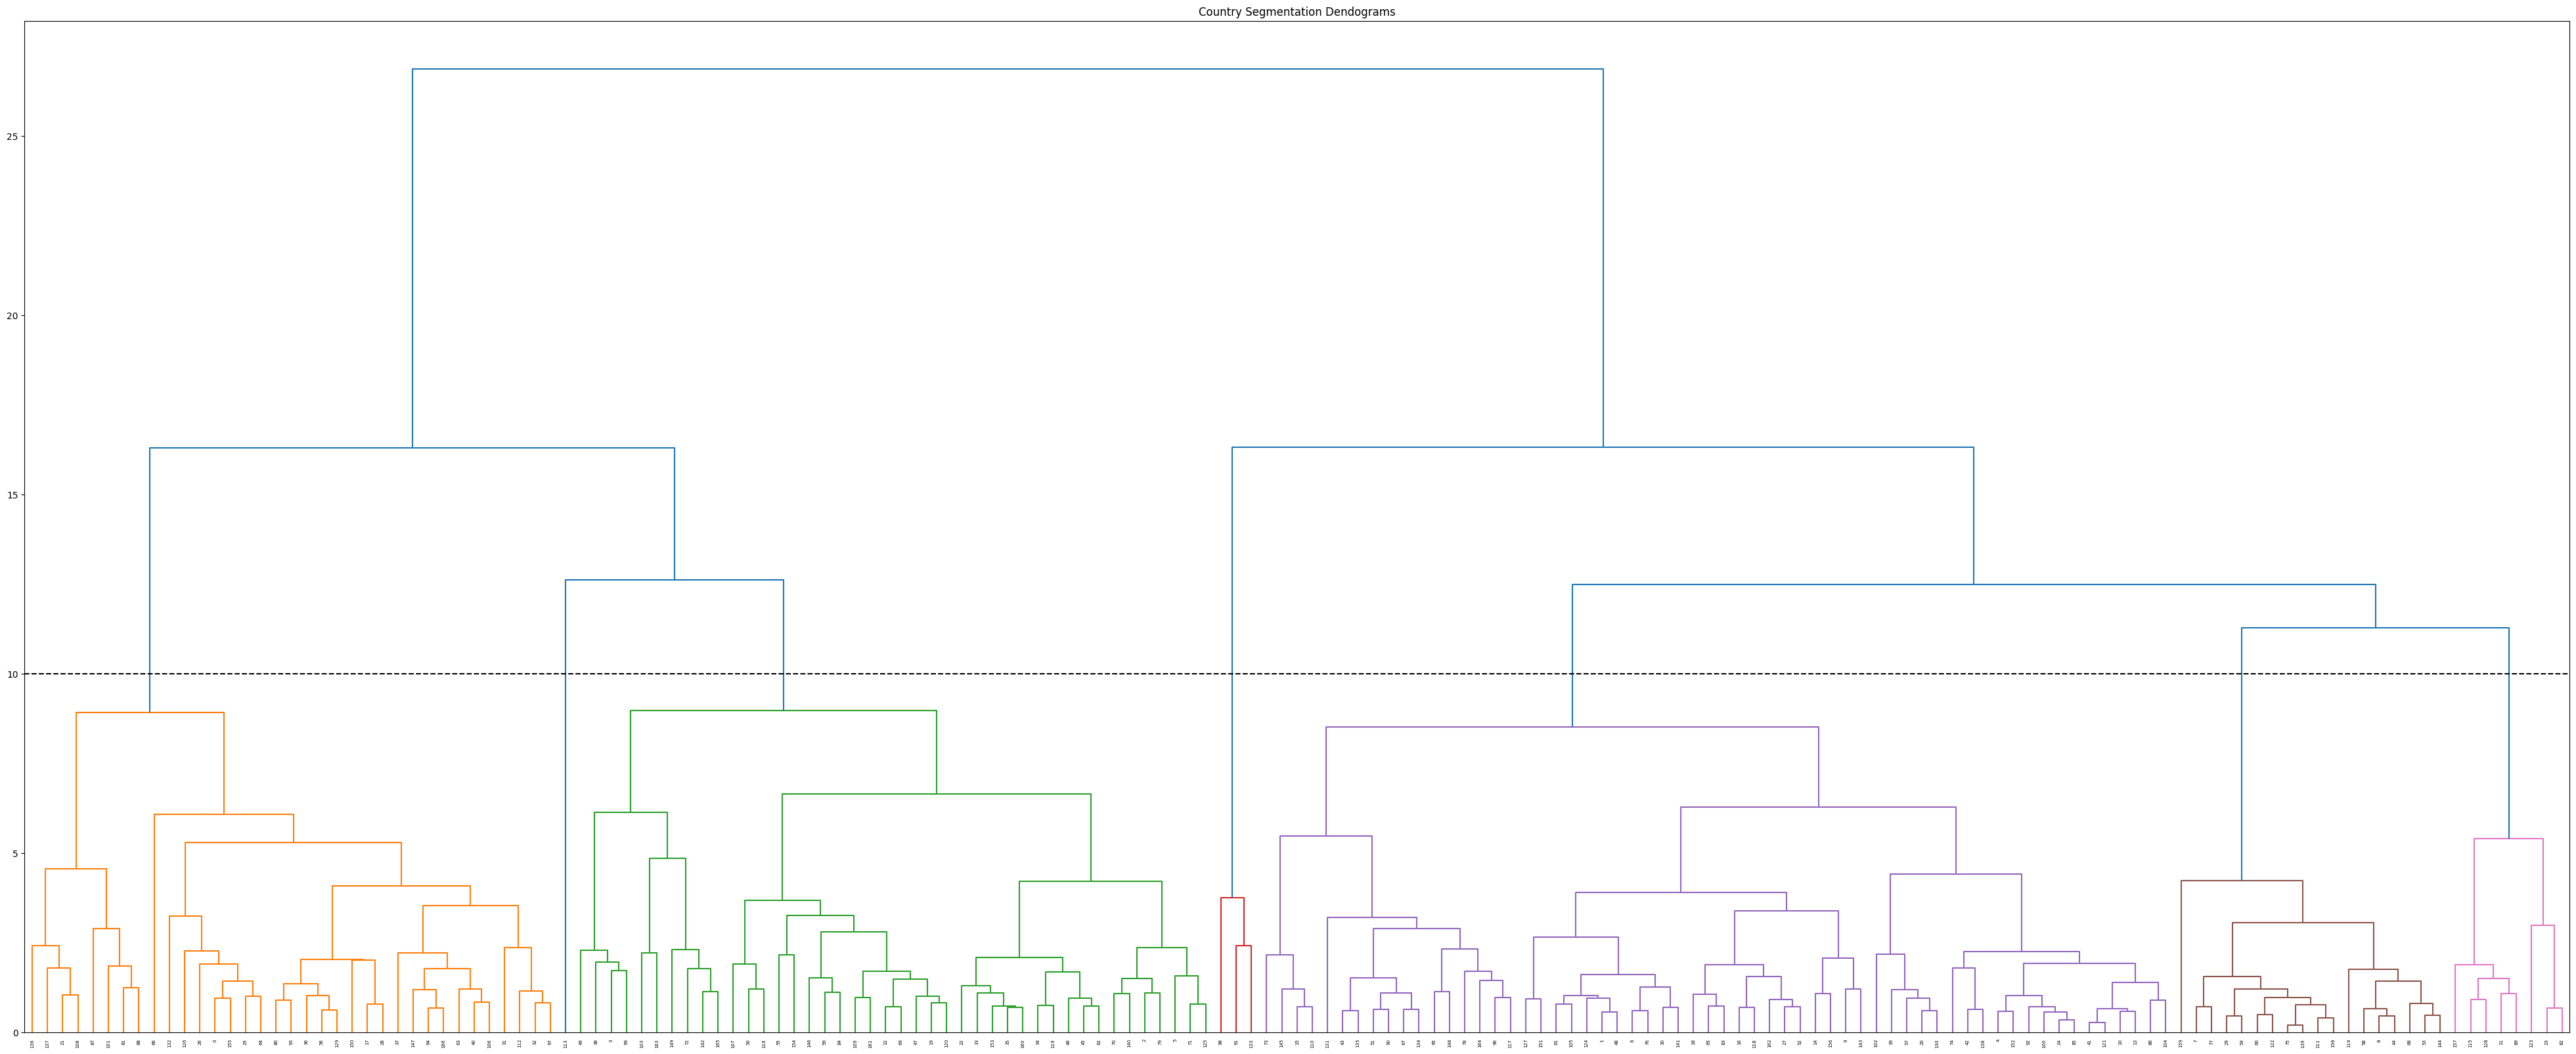

In [31]:
plt.figure(figsize=(50, 20))
plt.title("Country Segmentation Dendograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'),color_threshold=10)
plt.axhline(10, color='black', linestyle='--')
plt.show()

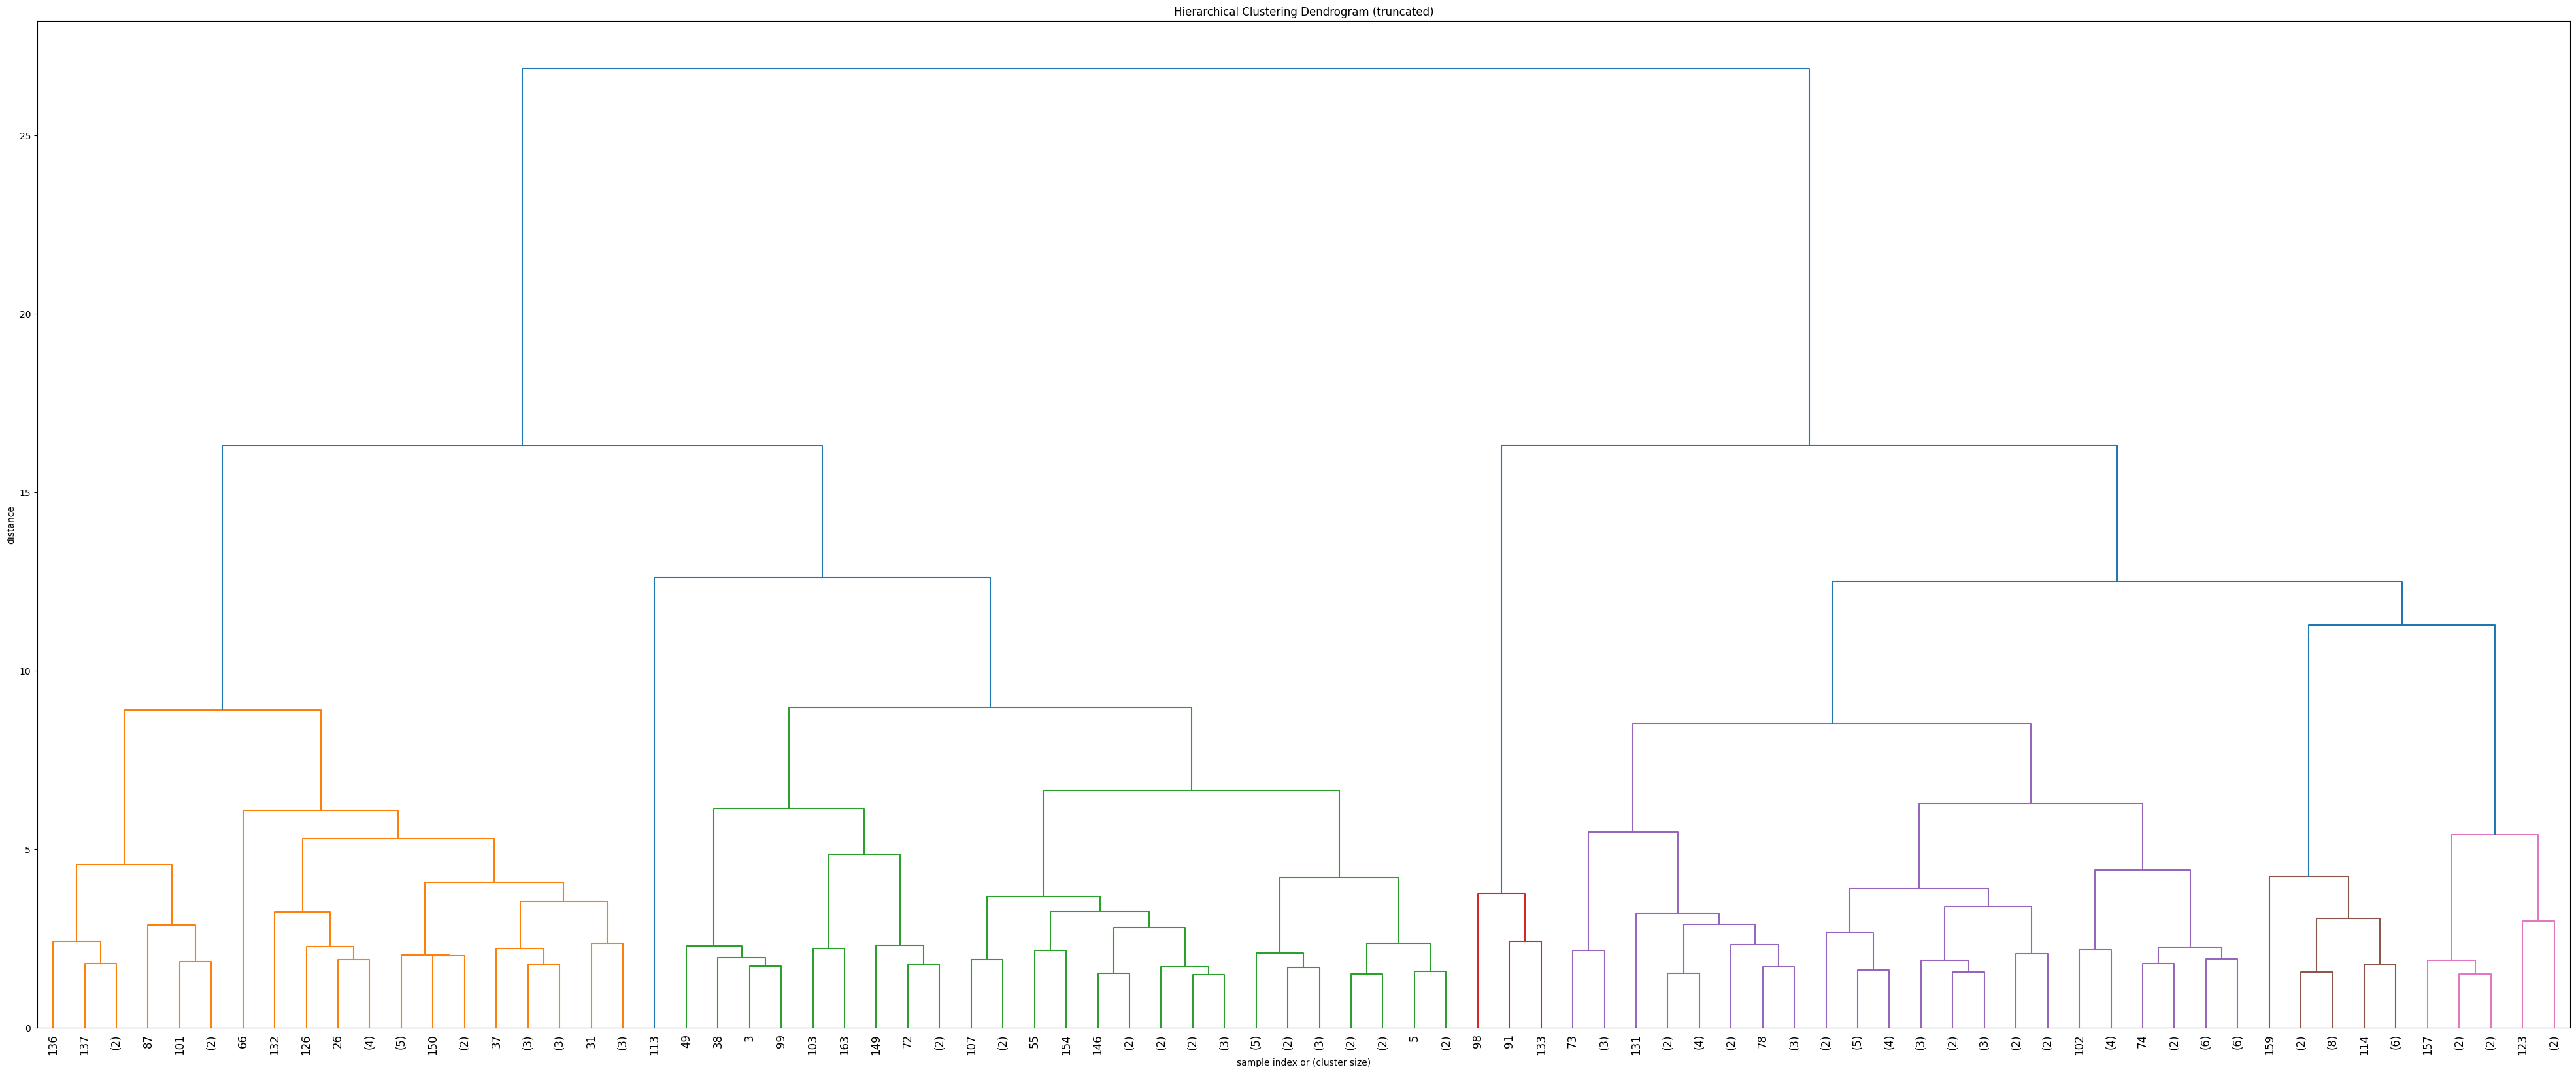

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(50, 20))
Z_Final = linkage(data_scaled, 'ward', metric='euclidean')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_Final,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=80,  # show only the last p merged clusters
    leaf_rotation=90,
    leaf_font_size=12,
    color_threshold=10 
)
plt.show()

In [33]:
#Method 1

clusters_1 = shc.fcluster(shc.linkage(data_scaled, method='ward'), 3, criterion='maxclust')# Here 3 is number of clusters we want
clusters_1


array([1, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3, 1,
       1, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3,
       3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3,
       1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 2, 3, 1, 1, 3, 3, 1, 2, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1,
       3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3,
       1, 2, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 3, 1,
       1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1], dtype=int32)

In [34]:
clusters_2 = shc.fcluster(shc.linkage(data_scaled, method='ward'),10 , criterion='distance')# here 10 is the value of color_threshold in the dendrogram
clusters_2

array([1, 5, 2, 2, 5, 2, 5, 6, 6, 5, 5, 7, 2, 5, 5, 5, 5, 1, 5, 2, 5, 1,
       2, 7, 5, 1, 1, 5, 1, 6, 5, 1, 1, 2, 2, 2, 1, 1, 2, 5, 1, 5, 5, 5,
       6, 2, 2, 2, 5, 2, 2, 5, 5, 6, 6, 2, 1, 5, 6, 2, 6, 5, 2, 1, 1, 5,
       1, 5, 6, 2, 2, 2, 2, 5, 5, 6, 5, 6, 5, 2, 1, 1, 7, 5, 2, 5, 5, 1,
       1, 7, 5, 4, 5, 1, 1, 5, 5, 1, 4, 2, 5, 1, 5, 2, 5, 5, 1, 2, 1, 2,
       5, 6, 1, 3, 6, 7, 2, 5, 5, 2, 2, 5, 6, 7, 5, 2, 1, 5, 7, 1, 5, 5,
       1, 4, 5, 5, 1, 1, 5, 6, 2, 5, 2, 5, 6, 5, 2, 1, 5, 2, 1, 5, 5, 2,
       2, 1, 5, 7, 6, 6, 2, 2, 5, 2, 5, 2, 1], dtype=int32)

In [35]:
data['cluster_1']= clusters_1
data['cluster_2']= clusters_2
data.head()

NameError: name 'data' is not defined